   ## Line Detection - Using Hough Lines
   
**cv2.HoughLines**(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)
- Threshold here is the minimum vote for it to be considered a line


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('soduku.jpg')

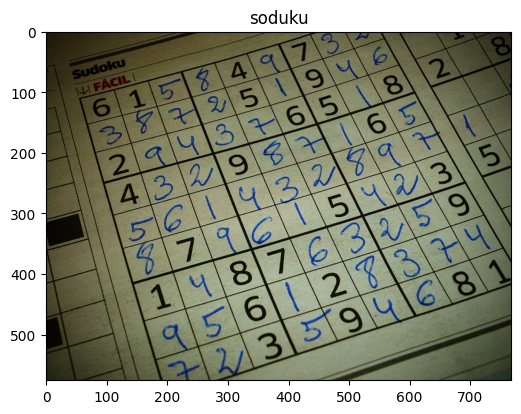

In [3]:
plt.figure(figsize=(6, 6))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('soduku')

plt.show()

In [4]:
# Convert image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny edges extracted
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

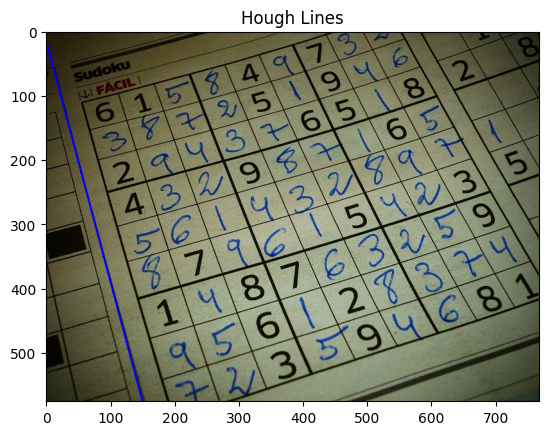

In [5]:
# Run HoughLines using a rho accuracy of 1 pixel theta accuracy of np.pi / 180 which is 1 degree.
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# We iterate through each line and convert it to the format required by cv.lines (i.e. requiring end points).
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hough Lines')
plt.show()

### Probabilistic Hough Lines

**cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)




In [11]:
image = cv2.imread('soduku.jpg')

# Convert image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny edges extracted
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

(14, 1, 4)


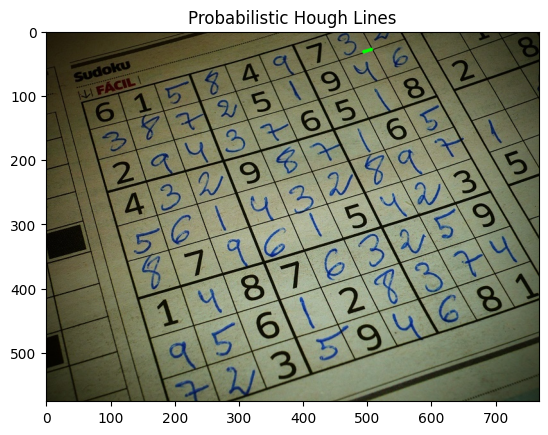

In [12]:
# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# and Min line length of 5 pixels and max gap between lines of 10 pixels
lines = cv2.HoughLinesP(edges, 50, np.pi / 180, 200, 5, 10)
print(lines.shape)

for x1, y1, x2, y2 in lines[0]:
    cv2.line(image, (x1, y1), (x2, y2),(0, 255, 0), 3)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Probabilistic Hough Lines')
    plt.show()

http://cmp.felk.cvut.cz/~matas/papers/matas-bmvc98.pdf